In [3]:
import networkx as nx
from bs4 import BeautifulSoup
import requests
import re
import json
import pandas as pd
import os
IMPORT_FOLDER = "./data/"
EXPORT_FOLDER = "./res/"
with open(IMPORT_FOLDER+"data_items.json", "r", encoding="utf8") as f:
    mult_items = json.loads(f.read())

# TAGS

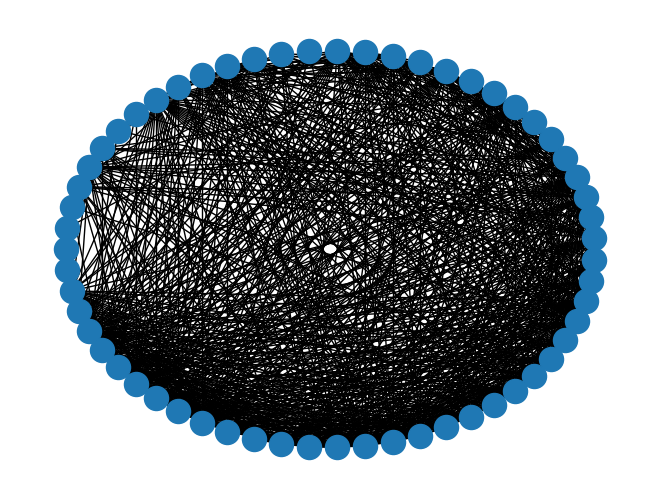

In [4]:

tag_dic = {}

for url in mult_items:
    # print(url, len(mult_items[url]["tags"]))
    for tag in mult_items[url]["tags"]:
        if tag not in tag_dic.keys():
            tag_dic[tag] = {}

for tag in tag_dic.keys():
    tag_dic[tag]["value"] = 0
    for url in mult_items:
        if tag in mult_items[url]["tags"]:
            tag_dic[tag]["value"] += 1
            for t in mult_items[url]["tags"]:
                if t != tag and t not in tag_dic[tag].keys():
                    tag_dic[tag][t] = {"weight" : 1}
                elif t != tag and t in tag_dic[tag].keys():
                    tag_dic[tag][t]["weight"] += 1


G = nx.Graph()

for url in mult_items:
    for tag in mult_items[url]["tags"]:
        if tag not in G.nodes():
            G.add_node(tag, value = 1)
        elif tag in G.nodes():
            G.nodes[tag]["value"] += 1

for node in G.nodes:
    for url in mult_items:
        if node in mult_items[url]["tags"]:
            for tag in mult_items[url]["tags"]:
                if node != tag and not G.has_edge(tag, node):
                    G.add_edge(node, tag, weight = 1)
                elif node != tag and G.has_edge(tag, node):
                    G[node][tag]["weight"] += 1

g = nx.Graph(tag_dic)
nx.draw_shell(G)
export = nx.cytoscape_data(G)
# with open(EXPORT_FOLDER+"tag_net.json", "w", encoding="utf8") as f:
#     f.write(json.dumps(export))

value = []
for tag in tag_dic.keys():
    value.append(tag_dic[tag]["value"])
val = pd.DataFrame(value)
val.index = tag_dic.keys()
# val.to_csv(EXPORT_FOLDER+"nodes_attributes.csv")
# print(json.dumps(export, indent = 4))

# AUTEURS

In [6]:

aut_dic = {}

for url in mult_items:
    # print(url, len(mult_items[url]["tags"]))
    for aut in mult_items[url]["auteurs"]:
        if aut not in aut_dic.keys():
            aut_dic[aut] = {}
            aut_dic[aut]["value"] = 1
        elif aut in aut_dic.keys():
            aut_dic[aut]["value"] += 1


for aut in aut_dic.keys():
    for url in mult_items:
        if aut in mult_items[url]["auteurs"]:
            # aut_dic[aut]["value"] += 1
            for a in mult_items[url]["tags"]:
                if a != aut and a not in aut_dic[aut].keys():
                    aut_dic[aut][a] = {"weight" : 1}
                elif a != aut and a in aut_dic[aut].keys():
                    aut_dic[aut][a]["weight"] += 1


G = nx.Graph()

for url in mult_items:
    for aut in mult_items[url]["auteurs"]:
        if aut not in G.nodes():
            G.add_node(aut, value = 1)
        elif aut in G.nodes():
            G.nodes[aut]["value"] += 1

for node in G.nodes:
    for url in mult_items:
        if node in mult_items[url]["auteurs"]:
            for aut in mult_items[url]["auteurs"]:
                if node != aut and not G.has_edge(aut, node):
                    G.add_edge(node, aut, weight = 1)
                elif node != aut and G.has_edge(aut, node):
                    G[node][aut]["weight"] += 1

# g = nx.Graph(aut_dic)
# print(list(nx.connected_components(g)))
# print(nx.number_connected_components(g))
# nx.draw(g)

#nx.draw(G)
# for i, item in enumerate(nx.connected_components(G)):
#     if len(item) > 2:
#         print(i, len(item), item)
# export = nx.cytoscape_data(G)
# with open(EXPORT_FOLDER+"aut_net.json", "w", encoding="utf8") as f:
#     f.write(json.dumps(export))

# value = []
# for aut in aut_dic.keys():
#     print(f"\r{aut_dic[aut]['value']}")
#     value.append(aut_dic[aut]["value"])
# val = pd.DataFrame(value)
# val.index = aut_dic.keys()
# val.to_csv(EXPORT_FOLDER+"autnodes_attributes.csv")

# TAG et AUTEURS

In [67]:
G = nx.Graph()

for item in mult_items.values():
    for aut in item["auteurs"]:
        if aut == 'A' or aut == "N":
            continue
        if aut not in G.nodes:
            G.add_node(aut, value = 1, type = "Auteurs")
        elif aut in G.nodes:
            G.nodes[aut]["value"] += 1
    for tag in item["tags"]:
        if tag == 'A' or tag == "N":
            continue
        if tag not in G.nodes:
            G.add_node(tag, value = 1, type = "Tags")
        elif tag in G.nodes:
            G.nodes[tag]["value"] += 1

for i, node in enumerate(G.nodes):
    print(f"\r{i, node}", end="")
    for item in mult_items.values():
        tags = item["tags"]
        auts = item["auteurs"]
        if node in tags:
            # for aut in auts:
            #     if aut == 'A' or aut == "N":
            #         continue
            #     if node != aut and not G.has_edge(aut, node):
            #         G.add_edge(node, aut, weight = 1)
            #     elif node != aut and G.has_edge(aut, node):
            #         G.edges[(node, aut)]["weight"] += 1
            # for tag in tags:
            #     if tag == 'A' or tag == "N":
            #         continue
            #     if node != tag and not G.has_edge(tag, node):
            #         G.add_edge(node, tag, weight = 1)
            #     elif node != tag and G.has_edge(tag, node):
            #         G.edges[(node, tag)]["weight"] += 1
            continue
        if node in auts:
            # for aut in auts:
            #     if aut == 'A' or aut == "N":
            #         continue
            #     if node != aut and not G.has_edge(aut, node):
            #         G.add_edge(node, aut, weight = 1)
            #     elif node != aut and G.has_edge(aut, node):
            #         G.edges[(node, aut)]["weight"] += 1
            for tag in tags:
                if tag == 'A' or tag == "N":
                    continue
                if node != tag and not G.has_edge(tag, node):
                    G.add_edge(node, tag, weight = 1)
                elif node != tag and G.has_edge(tag, node):
                    G.edges[(node, tag)]["weight"] += 1

# nx.draw(G)
export = nx.cytoscape_data(G)
with open(EXPORT_FOLDER+"all_net.json", "w", encoding="utf8") as f:
    f.write(json.dumps(export))

value = []
type = []
for node in G.nodes:
    value.append(G.nodes[node]["value"])
    type.append(G.nodes[node]["type"])
items = zip(value, type)
val = pd.DataFrame(items, columns=["value", "type"])
val.index = G.nodes
val.to_csv(EXPORT_FOLDER+"allnodes_attributes.csv")

(604, 'Noé DELARGILLIÈRE')))T')LEX')TIF FRANÇAIS') la Ville GIPIV"')S DE FRANCE"')

<AxesSubplot:>

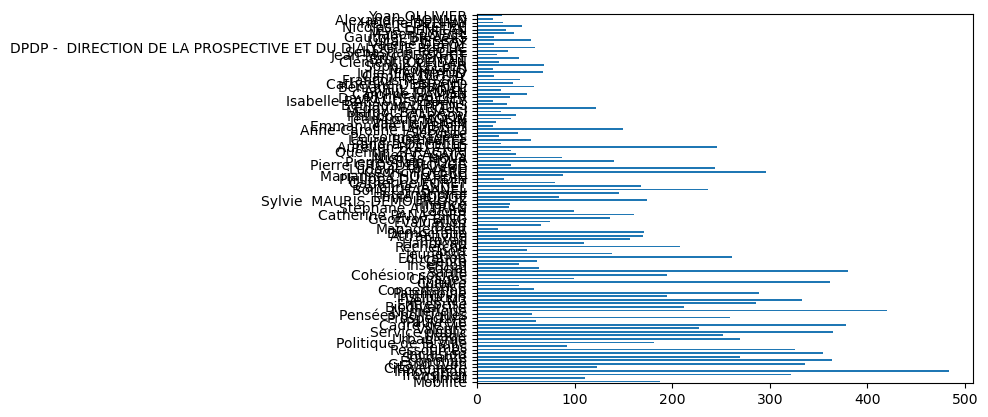

In [58]:
val[val.value > 15].value.plot(kind="barh")

In [65]:
nx.to_pandas_adjacency(G)

,Mobilité,Climat,Transition,Innovation,Citoyenneté,Grand Lyon,Économie,Solidarité,Inclusion,Ressources,...,Philippe DURANCE,Béatrice CHARRE,Mireille LEMAHIEU,David GRAND,Jean-Pierre VIGNAT,Jean FURTOS,Stéphanie PORNIN,Cécile PEETERS,Florence ABITBOL,Noé DELARGILLIÈRE
Mobilité,0.0,12.0,44.0,74.0,0.0,32.0,6.0,6.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Climat,12.0,0.0,42.0,0.0,2.0,50.0,0.0,0.0,0.0,72.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Transition,44.0,42.0,0.0,18.0,10.0,48.0,148.0,16.0,2.0,78.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
Innovation,74.0,0.0,18.0,0.0,6.0,76.0,86.0,12.0,20.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Citoyenneté,0.0,2.0,10.0,6.0,0.0,8.0,6.0,10.0,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jean FURTOS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Stéphanie PORNIN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
Cécile PEETERS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
Florence ABITBOL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
